### <font color=green>Los Simpson no necesitan presentación

<img src="33-f.jpg">

Con 27 temporadas y contando, es la serie de secuencias de comandos de más larga duración en la historia de la televisión estadounidense en horario estelar

Como un fanático del programa , presento algunos análisis breves sobre Springfield en este código de Python para descubrir datos interesantes.

In [68]:
#Importando librerias 

import sys 
!{sys.executable} -m pip install plotly==4 cufflinks

import pandas as pd
import numpy as np
import seaborn as sns
import cufflinks as cf
import plotly.tools as tls
from IPython.display import HTML

  Using cached https://files.pythonhosted.org/packages/58/f3/a49d3281cc7275164ecf89ad3497556b11d9661faa119becdf7f9d3b2125/plotly-4.0.0-py2.py3-none-any.whl
cufflinks 0.16 has requirement plotly<4.0.0a0,>=3.0.0, but you'll have plotly 4.0.0 which is incompatible.
  Found existing installation: plotly 3.0.0
    Uninstalling plotly-3.0.0:
      Successfully uninstalled plotly-3.0.0


ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [2]:
#Leemos el CSV con Pandas que contiene los personajes de todas estas temporadas 

simpsons_ch = pd.read_csv("simpsons_characters.csv")

In [3]:
#Comenzamos a conocer nuestras base

simpsons_ch.head()

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN


In [4]:
simpsons_ch.tail()

,id,name,normalized_name,gender
6717,5222,Ron Rabinowitz,ron rabinowitz,m
6718,5728,Martha Stewart,martha stewart,f
6719,1770,Officer Goodman,officer goodman,m
6720,1634,Evan Conover,evan conover,m
6721,1868,Agent Johnson,agent johnson,m


In [5]:
#Cantidad de personajes de las 27 temporadas

simpsons_ch.shape[0]

6722

In [6]:
#Cantidad de columnas de nuestro dataframe

simpsons_ch.shape[1]

4

In [7]:
#Nombres de las columnas

simpsons_ch.columns

Index(['id', 'name', 'normalized_name', 'gender'], dtype='object')

In [8]:
#Tipo de datos en cada columna 
#Tenemos una columna solamente de variables cuantitativas
#Todas las demas son categóricas

simpsons_ch.dtypes

id                  int64
name               object
normalized_name    object
gender             object
dtype: object

# Data Cleaning

In [9]:
#Datos nulos preocupantes
#Tenemos una columna, una de las más importantes que nos dice el género de cada personaje, con datos perdidos o NaN

simpsons_ch.isnull().sum()

id                    0
name                  0
normalized_name       0
gender             6399
dtype: int64

In [10]:
#Normalizamos dicha columna ya que no la podemos eliminar de nuestro dataset por la importancia que tiene 
#Lo que vamos a realizar es poner un valor en string para eliminarlos del dataset 
#VAmos a guardar el dataframe con NAN en NaN.csv

simpsons_ch['gender'] = simpsons_ch['gender'].fillna("n")

personajes_NaN = simpsons_ch[simpsons_ch['gender'] == 'n']
personajes_NaN.to_csv("NaN.csv")

personajes = simpsons_ch[simpsons_ch['gender'] != "n"]


In [11]:
#Con esta base vamos a trabajar
#Son los personajes sin datos perdidas

personajes.isnull().sum()

id                 0
name               0
normalized_name    0
gender             0
dtype: int64

In [12]:
#Vamos a limpiar el id y normalized_name que para el estudio no nos sirve de mucho 

personajes = personajes[['id', 'name', 'gender']]


In [13]:
#Base lista para trabajar
#La guardamos y comenzamos a trabajar los datos para confirmar o rechazar la primera hipótesis

personajes.head()

,id,name,gender
70,1,Marge Simpson,f
71,8,Bart Simpson,m
72,9,Lisa Simpson,f
73,17,Moe Szyslak,m
74,3,Seymour Skinner,m


## Visualización de datos 

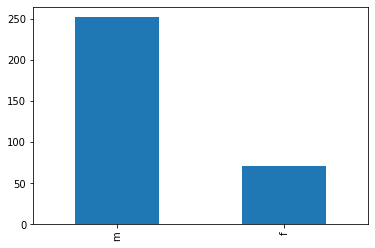

In [15]:
#En este grafico podemos observar como la gran mayoria de personajes son de genero masculino en las 27 temporadas 

pd.Series(personajes['gender']).value_counts().plot('bar')


In [16]:
#Un vistazo a las mujeres 
#Se encuentran las populares

girls = personajes[personajes['gender'] == 'f']
girls.to_csv('personajes_mujeres.csv')

In [17]:
#Un vistazo a los varones 
#Se encuentran las populares 

boys = personajes[personajes['gender'] == "m"]
boys.to_csv('personajes_varones.csv')

--------

In [18]:
#Trabajamos con otra variable 

episodios = pd.read_csv('simpsons_episodes.csv')

In [19]:
#Comenzamos a conocer nuestra base 

episodios.head()

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating,imdb_votes,image_url,video_url
0,10,Homer's Night Out,1990-03-25,7G10,1,10,10,30.3,50816.0,7.4,1511.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/275197507879
1,12,Krusty Gets Busted,1990-04-29,7G12,1,12,12,30.4,62561.0,8.3,1716.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/288019523914
2,14,"Bart Gets an ""F""",1990-10-11,7F03,2,1,14,33.6,59575.0,8.2,1638.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260539459671
3,17,Two Cars in Every Garage and Three Eyes on Eve...,1990-11-01,7F01,2,4,17,26.1,64959.0,8.1,1457.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260537411822
4,19,Dead Putting Society,1990-11-15,7F08,2,6,19,25.4,50691.0,8.0,1366.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260539459670


In [20]:
episodios.tail()

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating,imdb_votes,image_url,video_url
595,500,At Long Last Leave,2012-02-19,PABF07,23,14,500,5.77,45226.0,7.0,580.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/230541891832
596,502,How I Wet Your Mother,2012-03-11,PABF08,23,16,502,4.97,44818.0,7.3,541.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/230597187582
597,511,Adventures in Baby-Getting,2012-11-04,PABF18,24,3,511,5.65,39687.0,6.9,460.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/221688899646
598,542,Diggs,2014-03-09,SABF08,25,12,542,2.69,39292.0,6.4,473.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/310529091639
599,548,Days of Future Future,2014-04-13,SABF13,25,18,548,3.64,55742.0,7.0,504.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/310257731892


In [21]:
#600 episodios

episodios.shape[0]

600

In [22]:
#13 columnas a analizar 

episodios.shape[1]

13

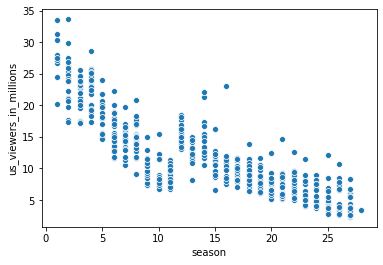

In [23]:
#Data Visualization para mostrar la caida de visualizaciones

sns.scatterplot(x= "season", y ="us_viewers_in_millions", data = episodios)

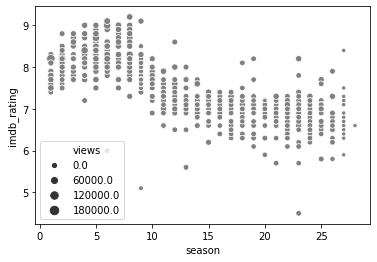

In [24]:
#La caida en el rating

sns.scatterplot(x= "season", y ="imdb_rating", data = episodios, color = "grey", size = "views")

In [25]:
#Identificando episodios más y menos vistos

episodios['us_viewers_in_millions'].max()

33.6

In [26]:
episodios[episodios['us_viewers_in_millions'] == 33.6]

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating,imdb_votes,image_url,video_url
2,14,"Bart Gets an ""F""",1990-10-11,7F03,2,1,14,33.6,59575.0,8.2,1638.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260539459671


In [27]:
episodios['us_viewers_in_millions'].min()

2.32

In [28]:
# Youtube
#El episodio más visto de Los Simpsons
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Z0fr3G-M1hI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/Cellar/ipython/7.5.0/libexec/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [29]:
episodios[episodios['us_viewers_in_millions'] == 2.32]


,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating,imdb_votes,image_url,video_url
518,591,The Burns Cage,2016-04-03,VABF10,27,17,591,2.32,190.0,6.5,246.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/770893891557


In [30]:
#El episodio menos visto en la historia de Los Simpsons

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/95npqVXUdjo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [31]:
#Antes de avanzar, generaremos una pivot table para guardar sobre cantidad de visualizaciones en US por temporada
#También la suma, el promedio y la mediana de cada temporada 

seasons_pt = pd.pivot_table(episodios,
                           index = 'season',
                           values = 'us_viewers_in_millions',
                           aggfunc = ['sum', 'mean', 'median'])

seasons_pt.to_csv('stats_seasons.csv')
seasons_pt


,sum,mean,median
,us_viewers_in_millions,us_viewers_in_millions,us_viewers_in_millions
season,,,
1,361.50,27.807692,27.500
2,536.90,24.404545,25.100
3,522.40,21.766667,22.350
4,492.70,22.395455,22.950
5,416.70,18.940909,19.600
6,389.90,15.596000,15.100
7,366.50,14.660000,14.600
8,321.20,14.600000,14.350


-------

In [32]:
#Leemos una nueva base para seguir investigando a fondo todo sobre Los Simpsons 

locations = pd.read_csv('simpsons_locations.csv')

In [33]:
#COnocemos nuestra base 

locations.head()

,id,name,normalized_name
0,1,Street,street
1,2,Car,car
2,3,Springfield Elementary School,springfield elementary school
3,4,Auditorium,auditorium
4,5,Simpson Home,simpson home


In [34]:
#Mas de 4459 localidades 

locations.shape[0]

4459

In [35]:
#3 columnas 

locations.shape[1]

3

------

In [36]:
#Para los errores que nos arrojan en algunas lineas, utilizamos error_bad_lines

strings_simpson = pd.read_csv("simpsons_script_lines.csv", sep=",", error_bad_lines=False)


b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

In [37]:
strings_simpson.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0


In [74]:
strings_simpson.tail()
type(strings_simpson)

pandas.core.frame.DataFrame

In [52]:
#Vamos a conocer los personajes que mas hablaron en las 27 temporadas 
#La familia Simpson, Homero como protagonista principal 

populars = strings_simpson.groupby('raw_character_text')['number'].count().sort_values(ascending = False).head(15)
populars = strings_simpson[strings_simpson['number'] > 1000]

In [122]:
#Vamos a conocer las localidades más frecuentadas en estos episodios de Los Simpsons
#La casa de Los Simpson es el lugar más popular de la serie 
#Le sigue la escuela de Springfield 
#Y en tercer lugar, la taverna de Moe 



popular_locations = strings_simpson.groupby('raw_location_text')['timestamp_in_ms'].count().sort_values(ascending = False).head(15)
popular_locations

raw_location_text
Simpson Home                       35056
Springfield Elementary School       7092
Moe's Tavern                        4626
Springfield Nuclear Power Plant     3593
Kwik-E-Mart                         1476
First Church of Springfield         1416
Simpson Living Room                 1378
Springfield Street                  1334
Springfield                         1314
Simpson Car                         1239
Flanders Home                       1166
Street                              1124
Springfield Town Hall               1103
Springfield Retirement Castle       1049
Burns Manor                          997
Name: timestamp_in_ms, dtype: int64

### Generación de pivot tables



In [123]:
populars_pt = pd.pivot_table(strings_simpson, index = 'raw_character_text',
                            values = 'word_count',
                            aggfunc = 'count')

location_pt = pd.pivot_table(strings_simpson, index = 'raw_location_text',
                            values = 'timestamp_in_ms',
                            aggfunc = 'count')

In [124]:

populars_pt = populars_pt.reindex(populars_pt.sort_values(by='word_count', ascending=False).index)
location_pt = location_pt.reindex(location_pt.sort_values(by = 'timestamp_in_ms', ascending = False).index)
populars_pt = populars_pt.head(20)
location_pt = location_pt.head(20)
populars_pt.to_csv("top20_personajes_populares.csv")
location_pt.to_csv("top20_lugares_populares.csv")


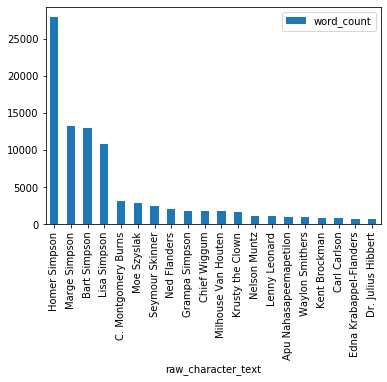

In [125]:
populars_pt.plot(kind = 'bar')

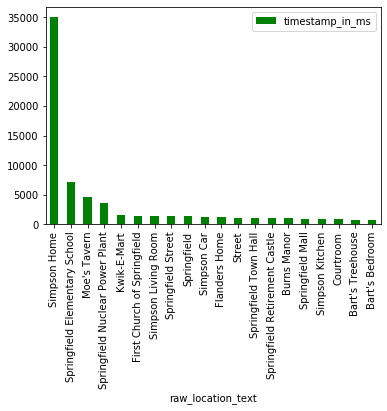

In [126]:
location_pt.plot(kind = "bar", color = "green")

## Conclusiones a partir de los datos

* Predomina el género masculino en los personajes de Los Simpsons. 
* A medida que fueron avanzando las temporadas, Los Simpsons no han parado de perder audiencia.
* 'Bart gets an F' (1990) es el episodio más visto de la historia.
* 'The Burns cage' (2016) es el episodio menos visto de la historia.
* Homero Simpson es el personaje más popular de la serie.
* La casa de Los Simpsons es el lugar más popular de la serie seguido de la Escuela de Springfield. 